In [1]:
#Importing the necessary Libraries. 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Loding the dataset
df=pd.read_csv('expenses.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Displaying the top 5 rows of dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Displaying the bottom 5 rows of dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# Displaying any random row of dataset 
df.sample()

,age,sex,bmi,children,smoker,region,charges
104,34,female,27.5,1,no,southwest,5003.853


In [6]:
# Displayin the information of dataset like column names, whether there is any null values in dataset ,datatypes of columns . 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Describing the datset 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
corr=df.corr()
corr.shape
print(corr)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


<AxesSubplot:>

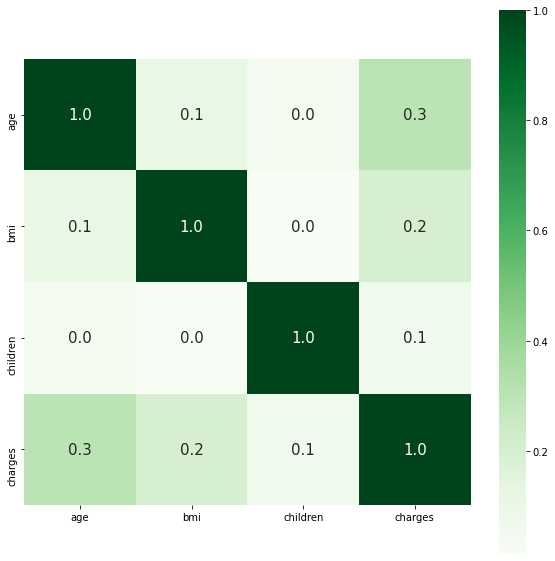

In [9]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')


In [10]:
# Checking total number of Null values in Each Column. 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Identifying the unique number of values in the dataset
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

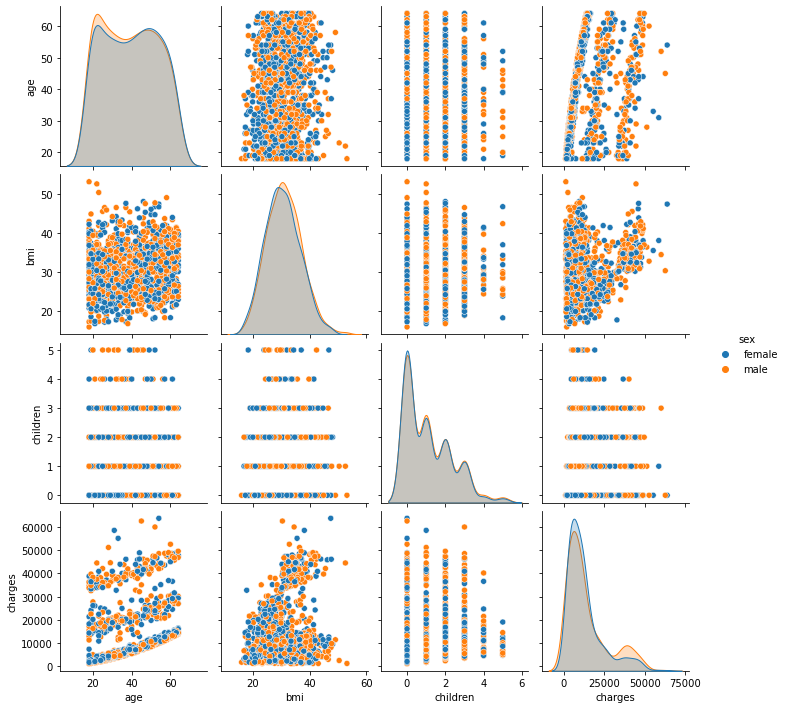

In [12]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "sex".

sns.pairplot(df,hue='sex')

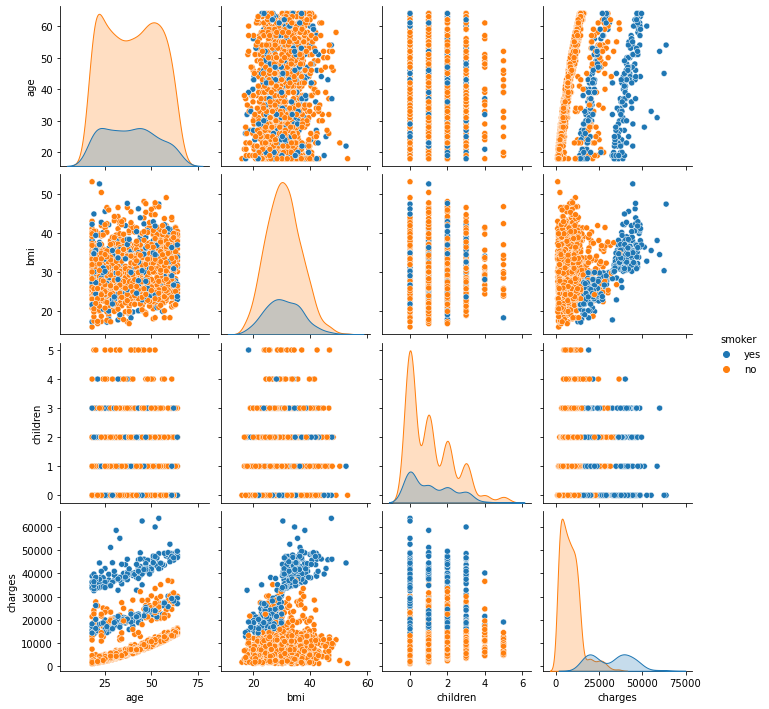

In [13]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "smoker".
sns.pairplot(df,hue='smoker')

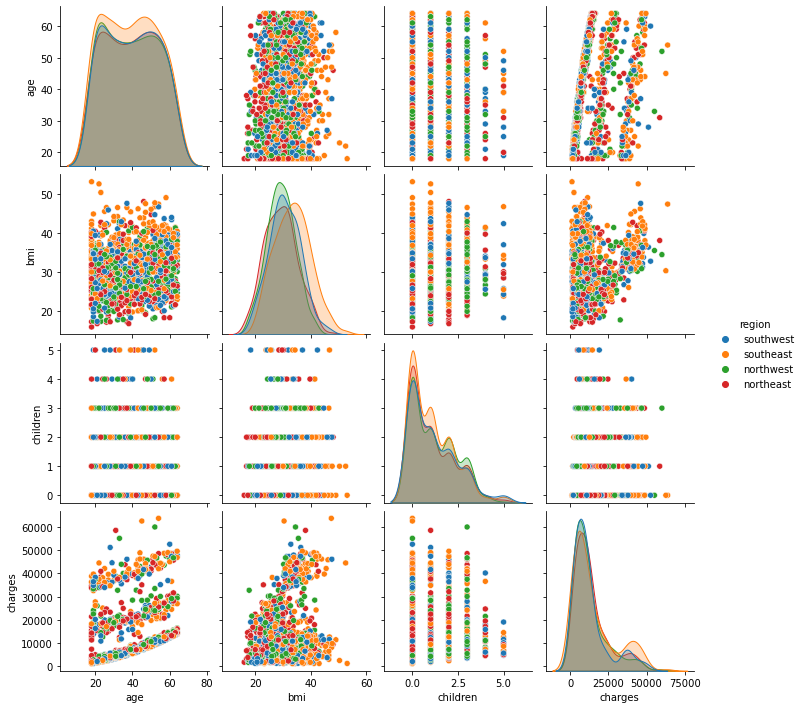

In [14]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "region".
sns.pairplot(df,hue='region')

In [12]:
# Finding How many people does Smoking 
df[df['smoker']=='yes'].value_counts().sum()

274

In [13]:
# Finding How many people who do not smoke .
df[df['smoker']=='no'].value_counts().sum()

1064

<AxesSubplot:>

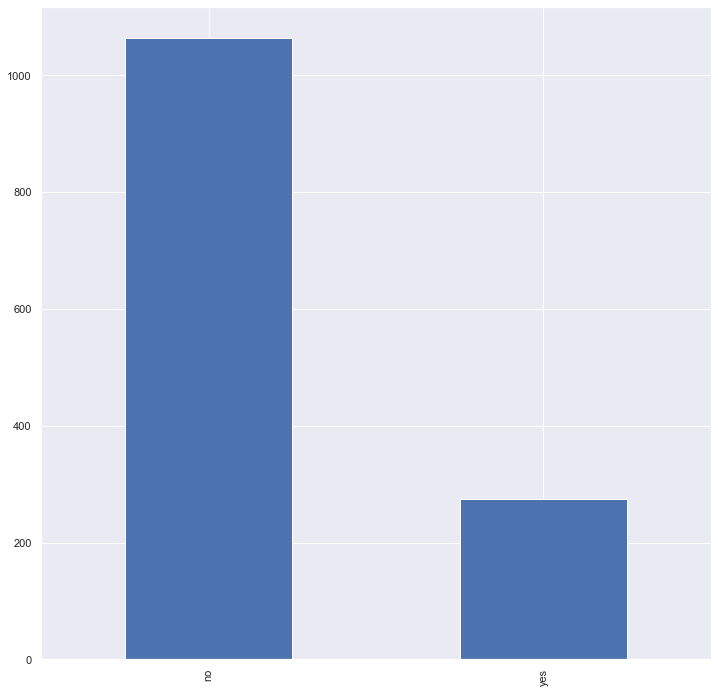

In [14]:
# Plotting the bar graph of number of people who do smoking and who do not do smoking.
sns.set(rc={'figure.figsize':(12,12)})
df.smoker.value_counts().plot(kind='bar')


C:\Users\Akash Kumbhalkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

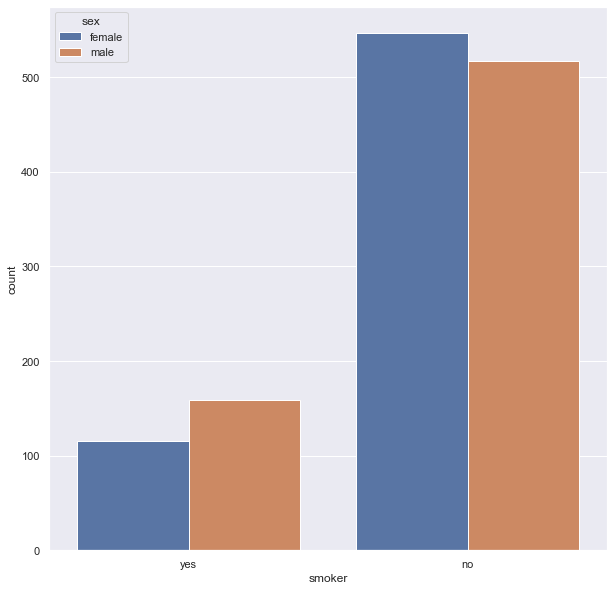

In [15]:
# Sex wise distribution of people who do smoking and who do not do smoking.
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(df.smoker,hue=df.sex,data=df)

C:\Users\Akash Kumbhalkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

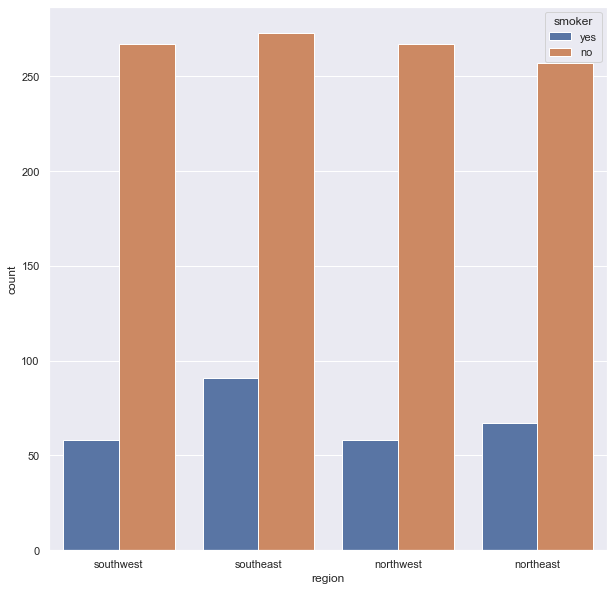

In [16]:
# Regionwise distribution of people who do smoking and who do not do smoking .
sns.countplot(df['region'],hue=df.smoker,data=df)

In [17]:
# classifying number of people who do not smoke as per region 
regionwise_notsmoke=df[df['smoker']=='no'].groupby('region').size().reset_index()
regionwise_notsmoke

,region,0
0,northeast,257
1,northwest,267
2,southeast,273
3,southwest,267


In [18]:
# classifying number of people who do smoking as per region 
regionwise_smoke=df[df['smoker']=='yes'].groupby('region').size().reset_index()
regionwise_smoke

,region,0
0,northeast,67
1,northwest,58
2,southeast,91
3,southwest,58


<AxesSubplot:title={'center':'Regionwise Smoking of People'}, xlabel='region'>

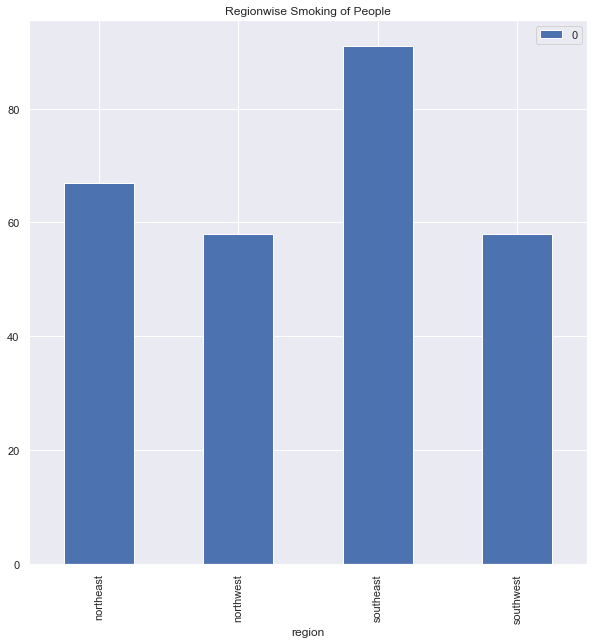

In [21]:
# Plotting regionwise Bar graph  who do smoking 
regionwise_smoke.set_index('region').plot(kind='bar',title='Regionwise Smoking of People')

<AxesSubplot:title={'center':'Regionwise People who does not do Smoking'}, xlabel='region'>

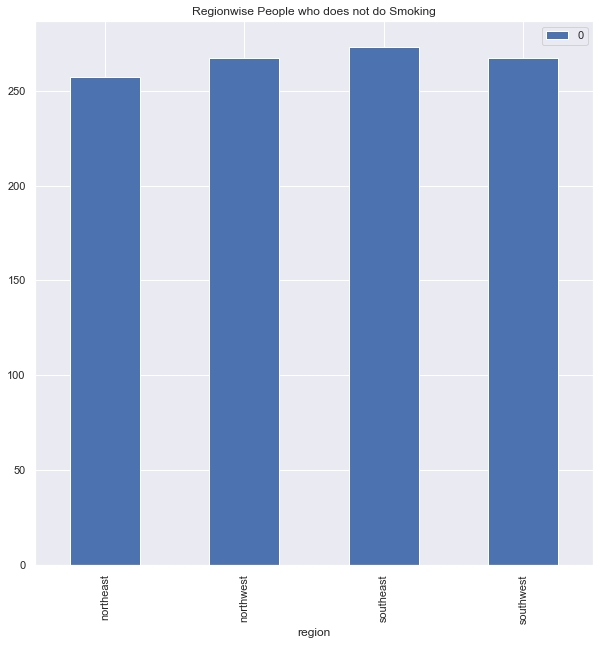

In [22]:
# plotting the regionwise bar graph who does not do smoking.
regionwise_notsmoke.set_index('region').plot(kind='bar',title='Regionwise People who does not do Smoking')

In [12]:
# Showing regionwise distribution of male 
regionwise_male=df[df['sex']=='male'].groupby('region').size().reset_index()
regionwise_male

,region,0
0,northeast,163
1,northwest,161
2,southeast,189
3,southwest,163


In [13]:
# Showing regionwise distribution of female 
regionwise_female=df[df['sex']=='female'].groupby('region').size().reset_index()
regionwise_female

,region,0
0,northeast,161
1,northwest,164
2,southeast,175
3,southwest,162


<AxesSubplot:xlabel='region'>

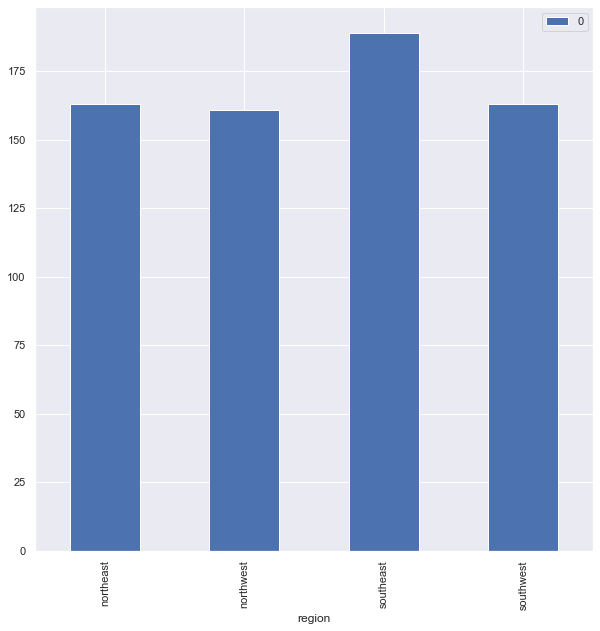

In [14]:
# Plotting regionwise bar graph  of male Distribution
regionwise_male.set_index('region').plot(kind='bar')

<AxesSubplot:xlabel='region'>

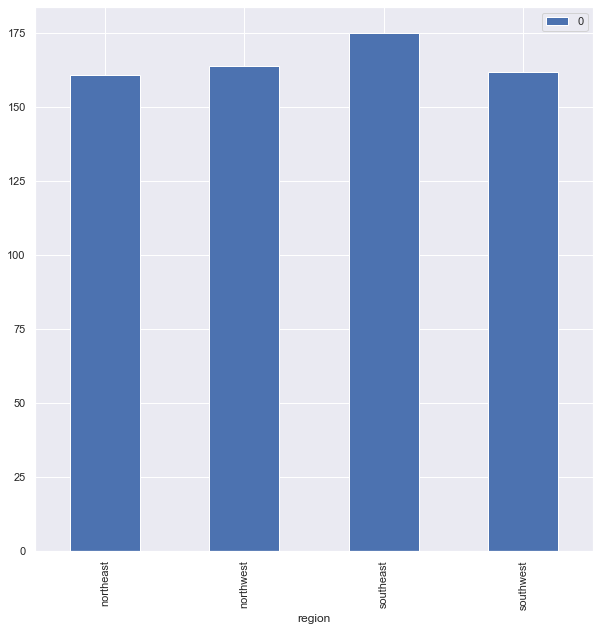

In [15]:
# Plotting regionwise bar graph  of female Distribution
regionwise_female.set_index('region').plot(kind='bar')

array([<AxesSubplot:ylabel='0'>], dtype=object)

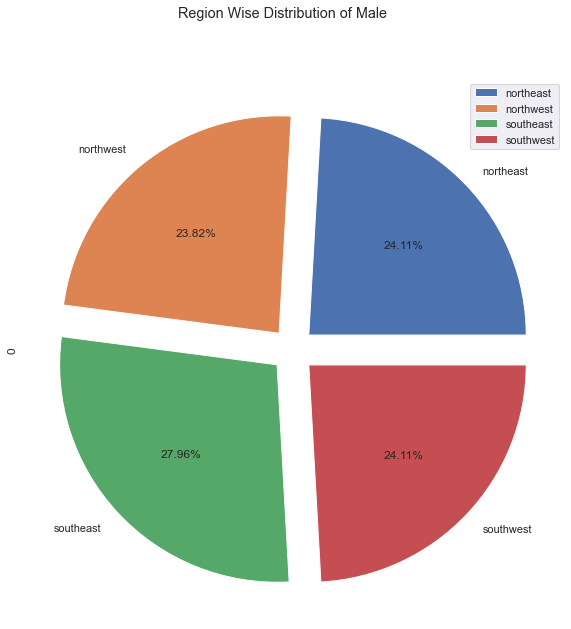

In [23]:
# Pie chart for regionwise distribution of male 
regionwise_male.set_index('region').plot(kind='pie',subplots=True,explode=(0.1,0.1,0.1,0.1),autopct='%1.2f%%',title='Region Wise Distribution of Male ')

array([<AxesSubplot:ylabel='0'>], dtype=object)

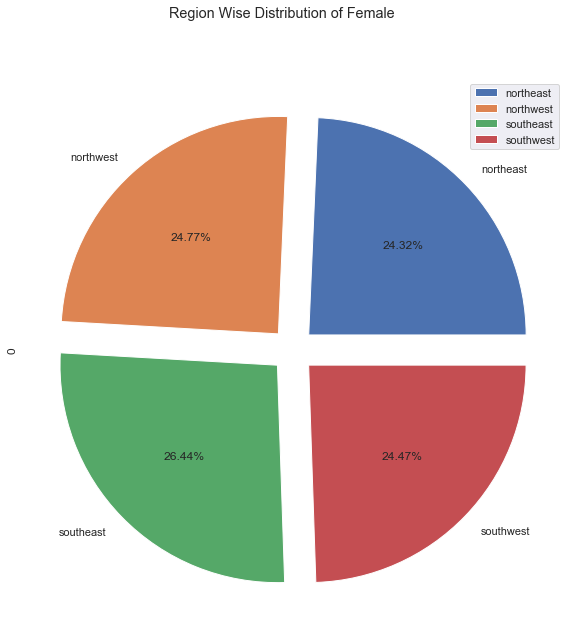

In [22]:
# Pie chart for regionwise distribution of female 
# plt.title('Region wise Distribution')
regionwise_female.set_index('region').plot(kind='pie',subplots=True,explode=(0.1,0.1,0.1,0.1),autopct='%1.2f%%',title='Region Wise Distribution of Female ')

## Now we will  split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [24]:
lbl_enc=LabelEncoder()

In [25]:
label1=lbl_enc.fit_transform(df['sex'])
label1

array([0, 1, 1, ..., 0, 0, 0])

In [26]:
df['Sex']=label1
df

,age,sex,bmi,children,smoker,region,charges,Sex
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [27]:
label2=lbl_enc.fit_transform(df['region'])
label2

array([3, 2, 2, ..., 2, 3, 1])

In [28]:
df['Region']=label2
df

,age,sex,bmi,children,smoker,region,charges,Sex,Region
0,19,female,27.900,0,yes,southwest,16884.92400,0,3
1,18,male,33.770,1,no,southeast,1725.55230,1,2
2,28,male,33.000,3,no,southeast,4449.46200,1,2
3,33,male,22.705,0,no,northwest,21984.47061,1,1
4,32,male,28.880,0,no,northwest,3866.85520,1,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,3


In [29]:
df_new=df.drop(['sex','region'],axis=1)
df_new

,age,bmi,children,smoker,charges,Sex,Region
0,19,27.900,0,yes,16884.92400,0,3
1,18,33.770,1,no,1725.55230,1,2
2,28,33.000,3,no,4449.46200,1,2
3,33,22.705,0,no,21984.47061,1,1
4,32,28.880,0,no,3866.85520,1,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,1,1
1334,18,31.920,0,no,2205.98080,0,0
1335,18,36.850,0,no,1629.83350,0,2
1336,21,25.800,0,no,2007.94500,0,3


In [30]:
label3=lbl_enc.fit_transform(df_new['smoker'])
label3

array([1, 0, 0, ..., 0, 0, 1])

In [31]:
df_new['Smoker']=label3
df_new

,age,bmi,children,smoker,charges,Sex,Region,Smoker
0,19,27.900,0,yes,16884.92400,0,3,1
1,18,33.770,1,no,1725.55230,1,2,0
2,28,33.000,3,no,4449.46200,1,2,0
3,33,22.705,0,no,21984.47061,1,1,0
4,32,28.880,0,no,3866.85520,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,1,1,0
1334,18,31.920,0,no,2205.98080,0,0,0
1335,18,36.850,0,no,1629.83350,0,2,0
1336,21,25.800,0,no,2007.94500,0,3,0


In [32]:
df_new=df_new.drop(['smoker'],axis=1)
df_new

,age,bmi,children,charges,Sex,Region,Smoker
0,19,27.900,0,16884.92400,0,3,1
1,18,33.770,1,1725.55230,1,2,0
2,28,33.000,3,4449.46200,1,2,0
3,33,22.705,0,21984.47061,1,1,0
4,32,28.880,0,3866.85520,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,2,0
1336,21,25.800,0,2007.94500,0,3,0


In [33]:
X=df_new.drop(['Smoker'],axis=1)
y=df_new.Smoker
y  

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: Smoker, Length: 1338, dtype: int32

In [34]:
X

,age,bmi,children,charges,Sex,Region
0,19,27.900,0,16884.92400,0,3
1,18,33.770,1,1725.55230,1,2
2,28,33.000,3,4449.46200,1,2
3,33,22.705,0,21984.47061,1,1
4,32,28.880,0,3866.85520,1,1
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,2
1336,21,25.800,0,2007.94500,0,3


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [36]:
X_train

,age,bmi,children,charges,Sex,Region
486,54,21.47,3,12475.3513,0,1
608,28,26.98,2,4435.0942,1,0
1025,21,34.60,0,2020.1770,0,3
388,26,22.61,0,3176.8159,0,1
1200,37,24.32,2,6198.7518,1,1
...,...,...,...,...,...,...
314,27,31.40,0,34838.8730,0,3
1076,47,32.00,1,8551.3470,0,3
926,19,23.40,2,2913.5690,0,3
1212,18,21.47,0,1702.4553,1,0


In [37]:
X_test

,age,bmi,children,charges,Sex,Region
1129,19,18.600,0,1728.89700,0,3
457,57,30.495,0,11840.77505,0,1
838,35,23.465,2,6402.29135,0,0
1070,37,37.070,1,39871.70430,1,2
295,18,22.990,0,1704.56810,1,0
...,...,...,...,...,...,...
684,33,18.500,1,4766.02200,0,3
19,30,35.300,0,36837.46700,1,3
689,27,31.130,1,34806.46770,1,2
1029,37,17.290,2,6877.98010,0,0


In [38]:
y_train

486     0
608     0
1025    0
388     0
1200    0
       ..
314     1
1076    0
926     0
1212    0
1289    0
Name: Smoker, Length: 936, dtype: int32

In [39]:
y_test

1129    0
457     0
838     0
1070    1
295     0
       ..
684     0
19      1
689     1
1029    0
378     0
Name: Smoker, Length: 402, dtype: int32

In [40]:
model1=DecisionTreeClassifier()

In [41]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
model1.score(X_test,y_test)

0.9601990049751243

In [43]:
pca=PCA()
df.shape

(1338, 9)

In [44]:
df2=pca.fit_transform(X)
df2.shape 

(1338, 6)

In [45]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(df2,y,test_size=0.3,random_state=30)

In [46]:
model2=DecisionTreeClassifier()

In [47]:
model2.fit(X_train_1,y_train_1)

DecisionTreeClassifier()

In [48]:
model2.score(X_test_1,y_test_1)

0.9651741293532339

In [49]:
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(df_new)
#Convert to table format - StandardScaler 
sc_X = pd.DataFrame(data=sc_X)
sc_X

,0,1,2,3,4,5,6
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.343905,1.970587
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,0.438495,-0.507463
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,0.438495,-0.507463
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.466915,-0.507463
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.466915,-0.507463
...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0.989591,-0.466915,-0.507463
1334,-1.509965,0.206139,-0.908614,-0.914002,-1.010519,-1.372326,-0.507463
1335,-1.509965,1.014878,-0.908614,-0.961596,-1.010519,0.438495,-0.507463
1336,-1.296362,-0.797813,-0.908614,-0.930362,-1.010519,1.343905,-0.507463


In [50]:
new_x=sc_X.drop([6],axis=1)

In [51]:
new_y=df['smoker']

In [52]:
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(new_x,new_y,test_size=0.3)

In [53]:
model3=DecisionTreeClassifier()

In [54]:
model3.fit(X_train_2,y_train_2)

DecisionTreeClassifier()

In [55]:
model3.score(X_test_2,y_test_2)

0.9427860696517413

In [56]:
predict1=model1.predict(X_test)

In [57]:
confusion_matrix(y_test,predict1)

array([[314,   8],
       [  8,  72]], dtype=int64)

In [58]:
predict2=model2.predict(X_test_1)

In [59]:
print(confusion_matrix(y_test_1,predict2))

[[313   9]
 [  5  75]]


In [60]:
predict3=model3.predict(X_test_2)

In [61]:
print(confusion_matrix(y_test_2,predict3))

[[298  15]
 [  8  81]]


In [62]:
y_score1 = model1.predict(X_test)

In [63]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [64]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.9375776397515527


In [65]:
auc_decision1 = auc(false_positive_rate1, true_positive_rate1)

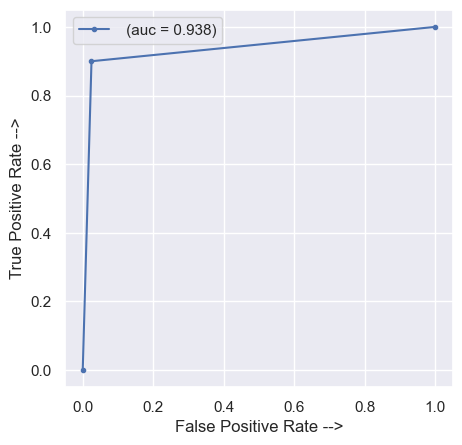

In [66]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(false_positive_rate1, true_positive_rate1, marker='.', label=' (auc = %0.3f)' % auc_decision1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()

Text(0.5, 0, 'False Positive Rate')

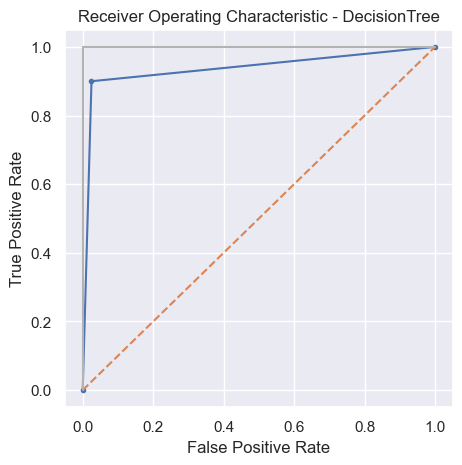

In [67]:
# plt.subplots(1, figsize=(15,15))
plt.figure(figsize=(5, 5), dpi=100)
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1, marker='.',label=' (auc = %0.3f)' % auc_decision1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.show()

In [68]:
print(classification_report(y_test,predict1)) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       322
           1       0.90      0.90      0.90        80

    accuracy                           0.96       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.96      0.96      0.96       402



In [69]:
print(classification_report(y_test_1,predict2)) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       322
           1       0.89      0.94      0.91        80

    accuracy                           0.97       402
   macro avg       0.94      0.95      0.95       402
weighted avg       0.97      0.97      0.97       402



In [70]:
print(classification_report(y_test_2,predict3)) 

              precision    recall  f1-score   support

          no       0.97      0.95      0.96       313
         yes       0.84      0.91      0.88        89

    accuracy                           0.94       402
   macro avg       0.91      0.93      0.92       402
weighted avg       0.95      0.94      0.94       402



In [71]:
# Decision Tree
timer1 = DecisionTreeClassifier()
# Train Decision Tree Classifier
start = time.time()
timer1 = timer1.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
time1=stop - start
score1=timer1.score(X_test,y_test)
score1

Training time: 0.006809234619140625s


0.9552238805970149

In [72]:
# Logistic regression
timer2 = LogisticRegression(random_state = 10) 
start = time.time()
timer2.fit(X_train,y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")
time2=stop - start
score2=timer2.score(X_test,y_test)

Training time: 0.035062551498413086s


In [73]:
# Random Forest
timer3=RandomForestClassifier(n_estimators=200)
start = time.time()
#Train the model using the training sets y_pred=clf.predict(X_test)
timer3.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
time3=stop - start
score3=timer3.score(X_test,y_test)

Training time: 0.44435763359069824s


In [74]:
# SVM
timer4 = SVC() 
start = time.time() 
# fitting x samples and y classes 
timer4.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
time4=stop - start
score4=timer4.score(X_test,y_test)

Training time: 0.03847455978393555s


In [75]:
# KNN
timer5 = KNeighborsClassifier()
start=time.time()
timer5.fit(X_train,y_train)
stop=time.time()
print(f"Training time: {stop - start}s")
time5=stop - start
score5=timer5.score(X_test,y_test)

Training time: 0.015300750732421875s


In [76]:
# naive Bayes
timer6 = GaussianNB()
start=time.time()
timer6.fit(X_train,y_train)
stop=time.time()
print(f"Training time: {stop - start}s")
time6=stop - start
score6=timer6.score(X_test,y_test)

Training time: 0.006379604339599609s


In [77]:
# Total models accuracy and Training Time
models = pd.DataFrame({
    'Model': [ 'Decision Tree','Logistic Regression','Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors','Naive Bayes',],
    'Score': [score1, score2, score3, score4, score5, score6],
    'Train Time':[time1,time2,time3,time4,time5,time6]
})
models.sort_values(by='Train Time', ascending=True)

,Model,Score,Train Time
5,Naive Bayes,0.895522,0.006380
0,Decision Tree,0.955224,0.006809
4,K - Nearest Neighbors,0.910448,0.015301
1,Logistic Regression,0.937811,0.035063
3,Support Vector Machines,0.900498,0.038475
2,Random Forest,0.960199,0.444358
